# Homework 1: Probability
Due: April 9, 2025

## Preliminaries

$$
p(z \mid x; s) = \left\{
\begin{array}{ll}
e^{-100 \cdot (||x-s|| - 0.2)^2}, & \text{if } z = Positive \\
1 - e^{-100 \cdot (||x-s|| - 0.2)^2}, & \text{if} z = Negative
\end{array}
\right.
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Plotting Measurements

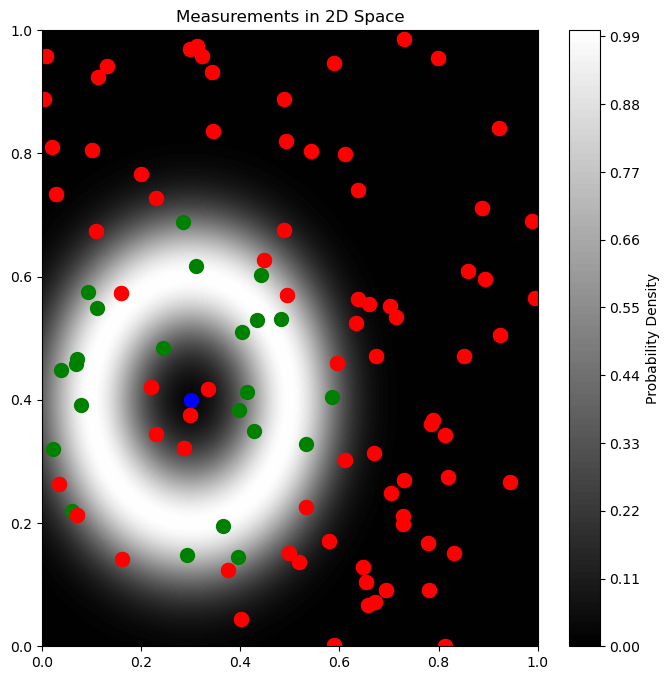

In [25]:
# p(z|x;s) = exp(-100 * (||x-s|| - 0.2)^2) if z = positive
# p(z|x;s) = 1 - exp(-100 * (||x-s|| - 0.2)^2) if z = negative
# f(x) = exp(-100 * (||x-s|| - 0.2)^2)

def f(x, s):
    return np.exp(-100 * (np.linalg.norm(x - s) - 0.2)**2)

s = np.array([0.3, 0.4]) # Source Location

# The 2D space is defined by the range [0, 1] x [0, 1]
# Uniformly sample 100 locations in the space, and simulate one measurement
# for each location. Plot the measurements in the space, green for positive
# and red for negative.

X = np.random.rand(100, 2) # 100 random locations in the space
Z = np.zeros((100, 2)) # 100 measurements

for i in range(100):
    x = X[i]
    if np.random.rand() < f(x, s):
        Z[i] = [1, 0] # Positive measurement
    else:
        Z[i] = [0, 1] # Negative measurement

plt.figure(figsize=(8, 8))

# Plot the "ring-shaped" region that f(x) describes
# The "brighter" the region, the more likely it is to be positive
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X1, Y1 = np.meshgrid(x, y)
Z1 = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z1[i, j] = f(np.array([X1[i, j], Y1[i, j]]), s)
plt.contourf(X1, Y1, Z1, levels=100, cmap='gray', alpha=1.0)
plt.colorbar(label='Probability Density')

# Plot the measurements
Z_pos = Z[:, 0] == 1
Z_neg = Z[:, 1] == 1
plt.scatter(X[Z_pos, 0], X[Z_pos, 1], c='green', s=100, marker='o', label='Positive Measurement')
plt.scatter(X[Z_neg, 0], X[Z_neg, 1], c='red', s=100, marker='o', label='Negative Measurement')
plt.scatter(X[Z[:, 1] == 1, 0], X[Z[:, 1] == 1, 1], c='red', s=100, marker='o', label='Negative Measurement')
plt.scatter(s[0], s[1], c='blue', s=100, label='Source Location')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Measurements in 2D Space')
plt.savefig('problem1.png')

## Problem 2: Unknown Source Location
The source location is unknown, and we want to estimate it from the 100 measurements. The likelihood of the source location $s$ can be expressed as:

$$
\mathcal{L}(s) = \prod_{i=1}^{N} p(z_i \mid x_i; s)
$$

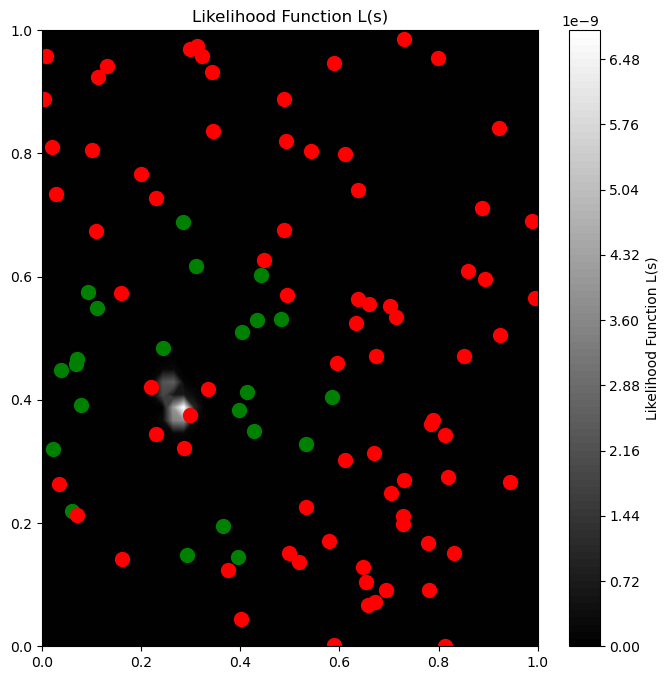

In [27]:
# Visualize the likelihood function L(s)
# which is in the same domain as the sensor
# Given the 100 measurements generated from Problem 1, denoted as {(x_i, z_i)}_{i=1...N}

def L(s):
    # L(s) = product_{i=1}^N p(z_i|x_i;s)
    # where p(z_i|x_i;s) = f(x_i, s) if z_i = positive
    # and p(z_i|x_i;s) = 1 - f(x_i, s) if z_i = negative
    likelihood = 1.0
    for i in range(100):
        x = X[i]
        if Z[i, 0] == 1: # Positive measurement
            likelihood *= f(x, s)
        else: # Negative measurement
            likelihood *= (1 - f(x, s))
    return likelihood

# Visualize the measurements on top of the likelihood function plot
# Note that you will need a mesh grid with at least 50 grid cells per dimension
# to sufficiently visualize the likelihood function

plt.figure(figsize=(8, 8))
# Plot the likelihood function L(s)
s1 = np.linspace(0, 1, 50)
s2 = np.linspace(0, 1, 50)
S1, S2 = np.meshgrid(s1, s2)
L_values = np.zeros(S1.shape)
for i in range(S1.shape[0]):
    for j in range(S1.shape[1]):
        s = np.array([S1[i, j], S2[i, j]])
        L_values[i, j] = L(s)
plt.contourf(S1, S2, L_values, levels=100, cmap='gray', alpha=1.0)
plt.colorbar(label='Likelihood Function L(s)')

# Plot measurements
plt.scatter(X[Z_pos, 0], X[Z_pos, 1], c='green', s=100, marker='o', label='Positive Measurement')
plt.scatter(X[Z_neg, 0], X[Z_neg, 1], c='red', s=100, marker='o', label='Negative Measurement')

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Likelihood Function L(s)')
plt.savefig('problem2.png')

## Problem 3: Single Location Sample
Repeat the process from problem 2 but uniformly sample one location in the space and assume
the sensor is stuck at that location for all 100 measurements.

Likelihood function L(s) at sampled location [0.95588703 0.34216387]: 1.0616797802763511e-20


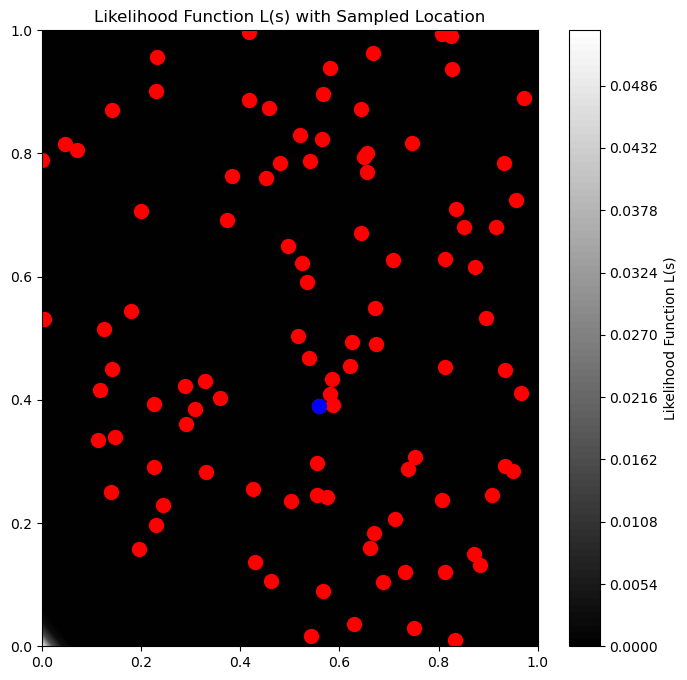

In [66]:
# Randomly pick a location to sample for evaluating the likelihood function
x = np.random.rand(2)

# Evaluate the likelihood function L(s) at the sampled location
L_sampled = L(x)
print(f"Likelihood function L(s) at sampled location {x}: {L_sampled}")

# Sample the same location 100 times
X = np.random.rand(100, 2) # 100 random locations in the space
Z = np.zeros((100, 2)) # 100 measurements
for i in range(100):
    x = X[i]
    if np.random.rand() < f(x, s=x):
        Z[i] = [1, 0] # Positive measurement
    else:
        Z[i] = [0, 1] # Negative measurement

Z_pos = Z[:, 0] == 1
Z_neg = Z[:, 1] == 1

plt.figure(figsize=(8, 8))
# Plot the likelihood function L(s)
s1 = np.linspace(0, 1, 50)
s2 = np.linspace(0, 1, 50)
S1, S2 = np.meshgrid(s1, s2)
L_values = np.zeros(S1.shape)
for i in range(S1.shape[0]):
    for j in range(S1.shape[1]):
        s = np.array([S1[i, j], S2[i, j]])
        L_values[i, j] = L(s)
plt.contourf(S1, S2, L_values, levels=100, cmap='gray', alpha=1.0)
plt.colorbar(label='Likelihood Function L(s)')
# Plot measurements
plt.scatter(X[Z_pos, 0], X[Z_pos, 1], c='green', s=100, marker='o', label='Positive Measurement')
plt.scatter(X[Z_neg, 0], X[Z_neg, 1], c='red', s=100, marker='o', label='Negative Measurement')
plt.scatter(x[0], x[1], c='blue', s=100, label='Sampled Location')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.title('Likelihood Function L(s) with Sampled Location')
plt.savefig('problem3.png')